In [3]:
import pandas as pd
import numpy as np

# Load your dataset
data = pd.read_csv('Housing.csv')

# Identify missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Drop rows with any missing values
data_dropped_rows = data.dropna()
print("\nData after dropping rows with missing values:\n", data_dropped_rows)

# Drop columns with any missing values
data_dropped_columns = data.dropna(axis=1)
print("\nData after dropping columns with missing values:\n", data_dropped_columns)

# Fill missing values with a specific value (e.g., 0)
data_filled = data.fillna(0)
print("\nData after filling missing values with 0:\n", data_filled)

# Fill missing values using forward fill
data_ffill = data.fillna(method='ffill')
print("\nData after forward fill:\n", data_ffill)

# Fill missing values using backward fill
data_bfill = data.fillna(method='bfill')
print("\nData after backward fill:\n", data_bfill)

# Interpolate missing values
data_interpolated = data.interpolate()
print("\nData after interpolation:\n", data_interpolated)

# Convert a column to a different data type (e.g., int)
data['bedrooms'] = data['bedrooms'].astype(int)
print("\nData types after conversion:\n", data.dtypes)

# Apply a function to transform the values of a column
data['area'] = data['area'].apply(lambda x: x / 1000)
print("\nData after transforming 'area' column:\n", data['area'])

# Normalize a column using Min-Max scaling
data['area_normalized'] = (data['area'] - data['area'].min()) / (data['area'].max() - data['area'].min())
print("\nData after Min-Max normalization of 'area':\n", data['area_normalized'])

# Standardize a column (z-score normalization)
data['area_standardized'] = (data['area'] - data['area'].mean()) / data['area'].std()
print("\nData after z-score standardization of 'area':\n", data['area_standardized'])

# Identify duplicate rows
duplicates = data.duplicated()
print("\nDuplicate rows:\n", duplicates)

# Drop duplicate rows
data_no_duplicates = data.drop_duplicates()
print("\nData after dropping duplicates:\n", data_no_duplicates)

# Drop duplicate rows based on specific columns
data_no_duplicates_columns = data.drop_duplicates(subset=['area', 'bedrooms'])
print("\nData after dropping duplicates based on 'area' and 'bedrooms':\n", data_no_duplicates_columns)

# Convert all string values in a column to lowercase
data['furnishingstatus'] = data['furnishingstatus'].str.lower()
print("\nData after converting 'furnishingstatus' to lowercase:\n", data['furnishingstatus'])

# Remove leading and trailing spaces from string values in a column
data['furnishingstatus'] = data['furnishingstatus'].str.strip()
print("\nData after stripping spaces from 'furnishingstatus':\n", data['furnishingstatus'])

# Replace a specific substring in a column with another substring
data['furnishingstatus'] = data['furnishingstatus'].str.replace('furnished', 'fully furnished')
print("\nData after replacing 'furnished' with 'fully furnished':\n", data['furnishingstatus'])

# Convert a categorical column to numerical using one-hot encoding
data_one_hot = pd.get_dummies(data, columns=['furnishingstatus'])
print("\nData after one-hot encoding 'furnishingstatus':\n", data_one_hot.head())

# Convert a categorical column to numerical using label encoding
data['furnishingstatus_encoded'] = data['furnishingstatus'].astype('category').cat.codes
print("\nData after label encoding 'furnishingstatus':\n", data['furnishingstatus_encoded'])

# Group values in a categorical column and create a new column with grouped categories
data['parking_grouped'] = data['parking'].apply(lambda x: '3+' if x >= 3 else '0-2')
print("\nData after grouping 'parking':\n", data['parking_grouped'])

# Create a new column based on existing columns
data['price_per_area'] = data['price'] / data['area']
print("\nData after creating 'price_per_area' column:\n", data['price_per_area'])

# Discretize a continuous column into bins
data['price_bins'] = pd.cut(data['price'], bins=5)
print("\nData after discretizing 'price':\n", data['price_bins'])

# Create polynomial features from existing numerical columns
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
area_poly = poly.fit_transform(data[['area']])
print("\nPolynomial features from 'area':\n", area_poly[:5])


Missing Values:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Data after dropping rows with missing values:
         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no 

In [4]:

data = pd.DataFrame({
    'date_column': ['2024-01-01', '2024-02-15', '2024-03-30'],
    'value': [10, 20, 30]
})

# Convert a column to datetime format
data['date_column'] = pd.to_datetime(data['date_column'])

# Extract year, month, and day from a datetime column
data['year'] = data['date_column'].dt.year
data['month'] = data['date_column'].dt.month
data['day'] = data['date_column'].dt.day

# Filter rows based on a date range
start_date = '2024-01-01'
end_date = '2024-12-31'
filtered_data = data[(data['date_column'] >= start_date) & (data['date_column'] <= end_date)]

# Example of another DataFrame for merging and concatenation
other_dataframe = pd.DataFrame({
    'common_column': ['A', 'B', 'C'],
    'other_value': [100, 200, 300]
})

# Concatenate two DataFrames vertically
data_concatenated = pd.concat([data, data], axis=0)

# Concatenate two DataFrames horizontally
data_concatenated_horizontal = pd.concat([data, data], axis=1)

# Display outputs
print("Data with Date Components:\n", data)
print("\nFiltered Data:\n", filtered_data)
print("\nConcatenated Data (Vertical):\n", data_concatenated)
print("\nConcatenated Data (Horizontal):\n", data_concatenated_horizontal)


Data with Date Components:
   date_column  value  year  month  day
0  2024-01-01     10  2024      1    1
1  2024-02-15     20  2024      2   15
2  2024-03-30     30  2024      3   30

Filtered Data:
   date_column  value  year  month  day
0  2024-01-01     10  2024      1    1
1  2024-02-15     20  2024      2   15
2  2024-03-30     30  2024      3   30

Concatenated Data (Vertical):
   date_column  value  year  month  day
0  2024-01-01     10  2024      1    1
1  2024-02-15     20  2024      2   15
2  2024-03-30     30  2024      3   30
0  2024-01-01     10  2024      1    1
1  2024-02-15     20  2024      2   15
2  2024-03-30     30  2024      3   30

Concatenated Data (Horizontal):
   date_column  value  year  month  day date_column  value  year  month  day
0  2024-01-01     10  2024      1    1  2024-01-01     10  2024      1    1
1  2024-02-15     20  2024      2   15  2024-02-15     20  2024      2   15
2  2024-03-30     30  2024      3   30  2024-03-30     30  2024      3   30


# Extra Questions

Press 1 for Iris.csv
Press 2 for Housing.csv
Press 3 for Titanic.csv: 3
Press 1 for Age
Press 2 for SibSp
Press 3 for Fare: 1
Data type of the selected column: float64
Index: RangeIndex(start=0, stop=891, step=1)
The number of nulls in Age are 177
Max of Age: 80.0
Min of Age: 0.42
Mean of Age: 29.69911764705882
Mode of Age: 24.0
Variance of Age: 211.01912474630802
Median of Age: 28.0
Standard Deviation of Age: 14.526497332334042
33     66.0
54     65.0
96     71.0
116    70.5
280    65.0
456    65.0
493    71.0
630    80.0
672    70.0
745    70.0
851    74.0
Name: Age, dtype: float64
The number of outliers in Age are 11
Do you want to correct outliers? Press 00
55.0


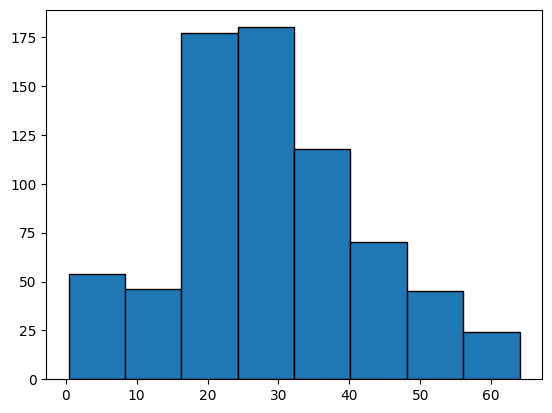

Do you want to process null values ? press 00
0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64
0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    28.0
Name: Age, dtype: float64


In [10]:
import matplotlib.pyplot as plt

column_name = ""
file = ""


def processing(file, column_name):
    df = pd.read_csv(file)
    # print(df)
    print("Data type of the selected column:", df[column_name].dtype)

    print("Index:", df.index)
    nullvalues = df[column_name].isna()
    indices_of_null_values = np.where(nullvalues)[0]
    print(f"The number of nulls in {column_name} are {len(indices_of_null_values)}")
    max = df[column_name].max()
    print(f"Max of {column_name}: {max}")
    min = df[column_name].min()
    print(f"Min of {column_name}: {min}")
    mean = df[column_name].mean()
    print(f"Mean of {column_name}: {mean}")
    mode = df[column_name].mode().values[0]
    print(f"Mode of {column_name}: {mode}")
    varr = df[column_name].var()
    print(f"Variance of {column_name}: {varr}")
    median = df[column_name].median()
    print(f"Median of {column_name}: {median}")
    print(f"Standard Deviation of {column_name}: {df[column_name].std()}")

    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[column_name][(df[column_name] < lower_bound) | (df[column_name]> upper_bound)]
    print(outliers)
    no_outliers = len(outliers)
    print(f"The number of outliers in {column_name} are {no_outliers}")
    if no_outliers > 0:
        ch = int(input("Do you want to correct outliers? Press 0"))
        if ch == 0:
            df.loc[outliers.index, column_name] = median
            print(df[column_name][15])
        else:
            print("No outliers found")
    plt.hist(df[column_name], bins=8, edgecolor='black')
    plt.show()


def missingvalue(column_name):
    df = pd.read_csv(file)
    print(df['Age'])
    df['Age'].fillna(df['Age'].median(),inplace=True)
    print(df['Age'].head(6))


input1 = int(input("Press 1 for Iris.csv\nPress 2 for Housing.csv\nPress 3 for Titanic.csv: "))
if input1 == 1:
    file = "iris.csv"
elif input1 == 2:
    file = "Housing.csv"
elif input1 == 3:
    file = "titanic.csv"

if file == "Iris.csv":

    input2 = int(input("Press 1 for SepalLength\nPress 2 for SepalWidth\nPress 3 for PetalLength: "))
    if input2 == 1:
        column_name = "SepalLengthCm"
        processing(file, column_name)
    elif input2 == 2:
        column_name = "SepalWidthCm"
        processing(file, column_name)
    elif input2 == 3:
        column_name = "PetalLengthCm"
        processing(file, column_name)
elif file == "Housing.csv":

    input2 = int(input("Press 1 for Area\nPress 2 for Price\nPress 3 for Bedrooms: "))
    if input2 == 1:
        column_name = "area"
        processing(file, column_name)
    elif input2 == 2:
        column_name = "price"
        processing(file, column_name)
    elif input2 == 3:
        column_name = "bedrooms"
        processing(file, column_name)
elif file == "titanic.csv":

    input2 = int(input("Press 1 for Age\nPress 2 for SibSp\nPress 3 for Fare: "))
    if input2 == 1:
        column_name = "Age"
        processing(file, column_name)
        ch1 = int(input("Do you want to process null values ? press 0"))
        if ch1 == 0:
            missingvalue(column_name)

    elif input2 == 2:
        column_name = "SibSp"
        processing(file, column_name)
    elif input2 == 3:
        column_name = "Fare"
        processing(file, column_name)
